## NBA Players 2015-16 position prediction

Data below is originally from https://github.com/AddisonGauss/NbaData2015-2016/blob/master/nbasalariespoints.csv
<br>
Data contains list of top-paid basketball players in NBA for 2015-2016.
Columns represent:
<ul>
<li>Rk: rank</li>
<li>Player: player name</li>
<li>Pos: position - <strong>target variable</strong></li>
<li>Age: players age</li>
<li>GM, GP; GS: games played; games started</li>
<li>PTS: points</li>
<li>FGM, FGA, FG%: field goals made, attempted and percentage</li>
<li>FTM, FTA, FT%: free throws made, attempted and percentage</li>
<li>3FGM, 3FGA, 3FG%: three-point field goals made, attempted and percentage</li>
<li>REB, OREB, DREB: rebounds, offensive rebounds, defensive rebounds</li>
<li>AST: assists</li>
<li>STL: steals</li>
<li>BLK: blocks</li>
<li>TEAM - team which player plays for</li>
<li>SALARY - player's salary</li>
</ul>

In [84]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
#Reading and cleaning data
data = pd.read_csv('nbasalariespoints.csv')
del data['Unnamed: 0']
del data['Unnamed: 0.1']
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PS/G▼,RK,TEAM,SALARY
0,1.0,Stephen Curry,PG,27.0,GSW,79.0,79.0,34.2,10.2,20.2,...,5.4,6.7,2.1,0.2,3.3,2.0,30.1,54.0,Golden State Warriors,"$11,370,786"
1,2.0,James Harden,SG,26.0,HOU,82.0,82.0,38.1,8.7,19.7,...,6.1,7.5,1.7,0.6,4.6,2.8,29.0,24.0,Houston Rockets,"$15,756,438"
2,3.0,Kevin Durant,SF,27.0,OKC,72.0,72.0,35.8,9.7,19.2,...,8.2,5.0,1.0,1.2,3.5,1.9,28.2,7.0,Oklahoma City Thunder,"$20,158,622"
3,4.0,DeMarcus Cousins,C,25.0,SAC,65.0,65.0,34.6,9.2,20.5,...,11.5,3.3,1.6,1.4,3.8,3.6,26.9,23.0,Sacramento Kings,"$15,851,950"
4,5.0,LeBron James,SF,31.0,CLE,76.0,76.0,35.6,9.7,18.6,...,7.4,6.8,1.4,0.6,3.3,1.9,25.3,2.0,Cleveland Cavaliers,"$22,970,500"


In [62]:
data.dropna(inplace=True)
data.SALARY = data.SALARY.str.replace('$','').str.replace(',','').astype('int')

In [63]:
data.shape

(345, 33)

In [64]:
data.dtypes

Rk        float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PS/G▼     float64
RK        float64
TEAM       object
SALARY      int32
dtype: object

We see that most of variable are suitable and are in float format

In [65]:
data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G▼,RK,SALARY
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,...,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02
mean,214.379710,26.544928,58.553623,29.582609,21.642899,3.437391,7.714493,0.439023,0.774783,2.217101,...,2.936232,3.802899,2.093623,0.715072,0.405217,1.289275,1.813043,9.264058,198.582609,5.239291e+06
std,133.109822,4.437405,21.935374,30.219925,8.781108,2.092364,4.472840,0.064812,0.726193,1.874003,...,1.751741,2.362582,1.862892,0.448776,0.405882,0.810990,0.688044,5.803100,120.719354,5.374730e+06
min,1.000000,19.000000,2.000000,0.000000,3.000000,0.200000,0.800000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.900000,1.000000,4.970900e+04
25%,101.000000,23.000000,44.000000,2.000000,14.800000,1.800000,4.300000,0.406000,0.200000,0.600000,...,1.700000,2.100000,0.900000,0.400000,0.100000,0.700000,1.300000,4.800000,95.000000,1.335480e+06
50%,203.000000,26.000000,66.000000,15.000000,21.300000,3.000000,6.900000,0.439000,0.600000,1.800000,...,2.600000,3.300000,1.500000,0.600000,0.300000,1.100000,1.900000,8.100000,193.000000,3.110796e+06
75%,329.000000,30.000000,76.000000,60.000000,28.800000,4.700000,10.300000,0.473000,1.200000,3.400000,...,3.800000,5.000000,2.600000,0.900000,0.500000,1.700000,2.300000,12.500000,295.000000,7.070730e+06
max,469.000000,39.000000,82.000000,82.000000,38.100000,10.200000,20.500000,0.644000,5.100000,11.200000,...,9.900000,14.800000,11.700000,2.100000,2.000000,4.600000,3.600000,30.100000,419.000000,2.500000e+07


In [66]:
# Target variable - postition - is in string format
# to encode it properly we need to know all unique values
data.Pos.unique()

array(['PG', 'SG', 'SF', 'C', 'PF', 'PF-C', 'SG-SF'], dtype=object)

In [67]:
# Each position is encoding with corresponding integer 
# to make sure classifier can handle it
pos_encoding = {
    'PG': 1,
    'SG': 2,
    'SF': 3,
    'C': 4,
    'PF': 5,
    'PF-C': 6,
    'SG-SF': 7
}
data.Pos = data.Pos.replace(pos_encoding)

In [74]:
# Predictors are chosen only numerical columns
predictors = data[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PS/G▼', 'RK']]
targets = data.Pos

In [75]:
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=.4)

In [76]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(207, 27) (207,)
(138, 27) (138,)


Shapes are suitable for classifier run

In [77]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [78]:
sklearn.metrics.confusion_matrix(y_test, y_predicted)

array([[22,  3,  4,  0,  0,  0],
       [ 7, 12,  5,  0,  0,  0],
       [ 1, 13,  9,  0,  6,  0],
       [ 0,  0,  2, 17,  6,  0],
       [ 2,  1,  4,  7, 16,  0],
       [ 0,  0,  1,  0,  0,  0]])

In [79]:
sklearn.metrics.accuracy_score(y_test, y_predicted)

0.55072463768115942

Accuracy score is pretty low. It means that position is poorly predicted by playes characteristics with randomforest algorithm

In [80]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.01644793  0.02888872  0.02704459  0.03153741  0.03235152  0.03162036
  0.03949905  0.0377495   0.05293429  0.03385813  0.02438184  0.03398063
  0.03691984  0.03169868  0.02580346  0.02361338  0.03996535  0.05811208
  0.0416578   0.04771493  0.07997737  0.04467299  0.06205026  0.03418774
  0.03107778  0.02830954  0.02394485]


Each feature is given approximately same weight. It means that there is no correlation between yarget variable and others and no feature describes position perfectly

In [81]:
"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees = range(25)
accuracy = np.zeros(25)

for idx in range(len(trees)):
    classifier =RandomForestClassifier(n_estimators=idx + 1)
    classifier = classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    accuracy[idx] = sklearn.metrics.accuracy_score(y_test, y_predicted)

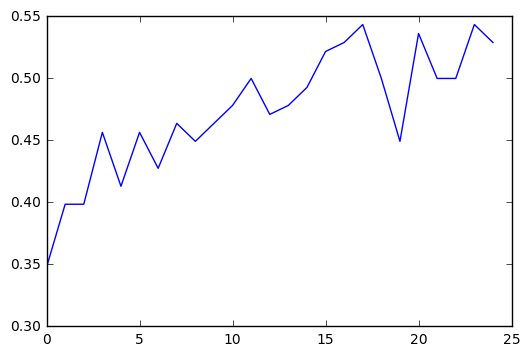

In [82]:
plt.cla()
plt.plot(trees, accuracy)
plt.show()

In conclusion it has to be said that less trees means poor quality of algorithm. However, after 16 trees there is no significant difference between algorithm accuracies.